# Assignment: Evaluating Data from a Form

A client has been testing a [small form](index.html) to gather some basic data about their client-base. They have brought their findings to you to validate the data they have gathered. You can open the `index.html` page in a browser to take a look at the form.

You have been provided a [dataset of csv records](../../data/form.csv) that contain entries from the form as well as some basic visualizations.The client pointed out that some of the visualizations look incorrect but they're unsure about how to resolve them. You can explore it in the [assignment notebook](assignment.ipynb).

## Instructions

Use the techniques in this lesson to make recommendations about the form so it captures accurate and consistent information.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#Loading the dataset
path = 'form.csv'
form_df = pd.read_csv(path)
print(form_df)

  birth_month       state   pet
0     January         NaN  Cats
1         JAN          CA  Cats
2        Sept      Hawaii   Dog
3     january          AK   Dog
4        July          RI  Cats
5   September  California  Cats
6       April          CA   Dog
7     January  California  Cats
8    November          FL   Dog
9    December     Florida  Cats


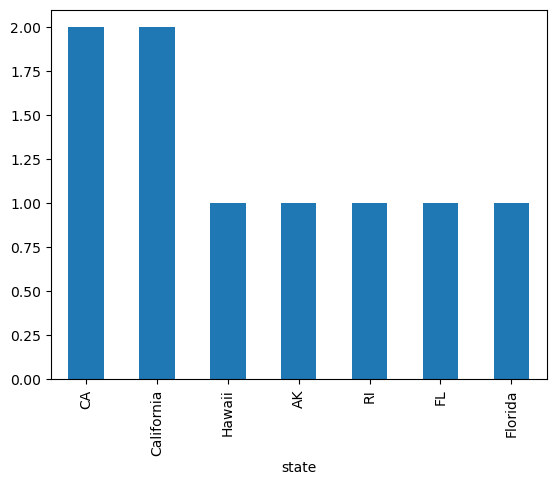

In [ ]:
form_df['state'].value_counts().plot(kind='bar');
plt.show()

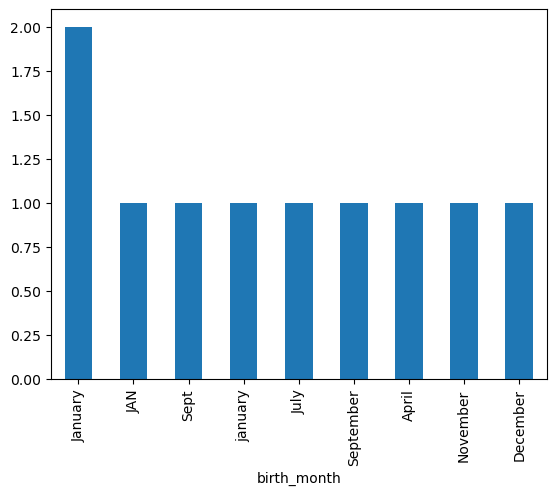

In [ ]:
form_df['birth_month'].value_counts().plot(kind='bar');
plt.show()

#### Solutions

In [ ]:
#taking a glance at the

form_df.head()

,birth_month,state,pet
0,January,NaN,Cats
1,JAN,CA,Cats
2,Sept,Hawaii,Dog
3,january,AK,Dog
4,July,RI,Cats


In [ ]:
form_df['birth_month'].unique()

array(['January', 'JAN', 'Sept', 'january', 'July', 'September', 'April',
       'November', 'December'], dtype=object)

Based on the data, I observed that there are inconsistencies in column "birth_month" and "state"
for example "January" & "JAN" mean thesame thing, same goes for the "state" column. We have to correct them!

In [ ]:
#Correcting Inconsistency in the columns with automated process learned from Datacamp
correct_month = ['January','July','September']
correct_state = ['California','Florida']

from thefuzz import process

#first lets convert the columns to lowercase

form_df['birth_month'] = form_df['birth_month'].str.title()

form_df['state'] = form_df['state'].str.title()


# process.extract('Ju',correct_month,limit=1)

# for month in correct_month:
#     matches = process.extract(month,form_df['birth_month'],limit=form_df.shape[0])
#     for potential_match in matches:
#         if potential_match[1] > 80:
#             form_df.loc[form_df['birth_month'] == potential_match[0],'birth_month'] = month

#convert the above to reusable function


def correct_cat_var(df,correct_cat_list,col_name):
    for correct_cat in correct_cat_list:
        matches = process.extract(correct_cat,df[col_name],limit=df.shape[0])
        for potential_match in matches:
            if potential_match[1] > 80:
                df.loc[df[col_name] == potential_match[0], [col_name]] = correct_cat
    print('Inconsistencies for {} corrected Successfully!'.format(col_name))


correct_cat_var(form_df,correct_month,'birth_month')
correct_cat_var(form_df,correct_state,'state')

Inconsistencies for birth_month corrected Successfully!
Inconsistencies for state corrected Successfully!


In [ ]:
form_df

,birth_month,state,pet
0,January,NaN,Cats
1,January,California,Cats
2,September,Hawaii,Dog
3,January,Ak,Dog
4,July,Florida,Cats
5,September,California,Cats
6,April,California,Dog
7,January,California,Cats
8,November,Florida,Dog
9,December,Florida,Cats


In [ ]:
#correting the AK to its full state name (Alaska)

form_df.loc[form_df["state"] == "Ak", "state"] = "Alaska"

form_df

,birth_month,state,pet
0,January,NaN,Cats
1,January,California,Cats
2,September,Hawaii,Dog
3,January,Alaska,Dog
4,July,Florida,Cats
5,September,California,Cats
6,April,California,Dog
7,January,California,Cats
8,November,Florida,Dog
9,December,Florida,Cats


In [ ]:
#dealing with missing values

form_df.isna().sum()

birth_month    0
state          1
pet            0
dtype: int64

In [ ]:
#only one column of the the first row (state) is missing, so we can assume the data is missing probably the form user forgot
#to enter his state. And since the most common state (mode) is california let's fill the missing with 'California'

form_df.fillna(method='bfill')

,birth_month,state,pet
0,January,California,Cats
1,January,California,Cats
2,September,Hawaii,Dog
3,January,Alaska,Dog
4,July,Florida,Cats
5,September,California,Cats
6,April,California,Dog
7,January,California,Cats
8,November,Florida,Dog
9,December,Florida,Cats


#### We can now visualize correctly

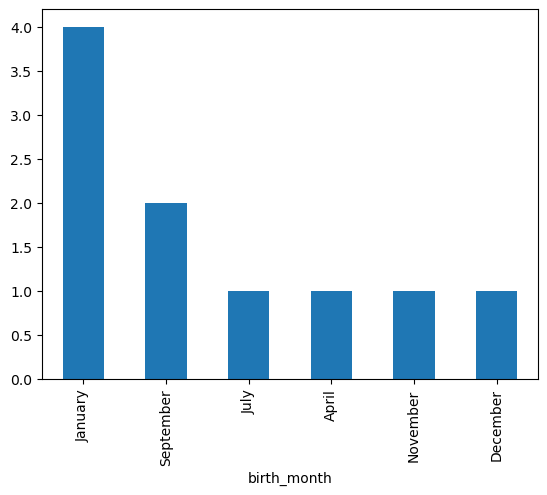

In [ ]:
form_df["birth_month"].value_counts().plot(kind='bar')
plt.show()

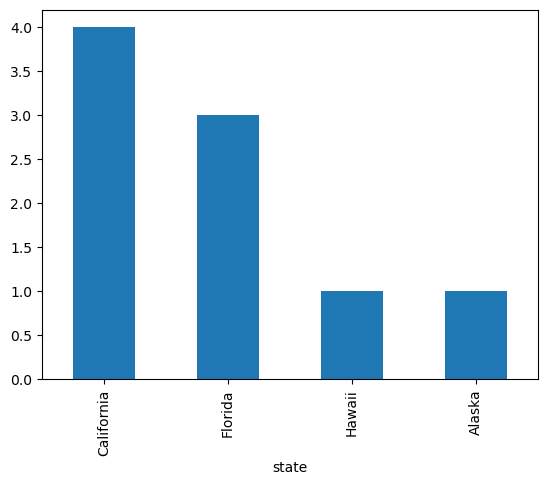

In [ ]:
form_df["state"].value_counts().plot(kind='bar')
plt.show()

#### Recommendations for the form

    - The form should restrict users from typing The values for State & birth month, instead, it should provide options from which the user will select to avoid inconsistencies